### 01. 라이브러리 임포트

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import sklearn.metrics as mt

from sklearn import svm                       # svm 라이브러리에 svc/svr 모두 존재
from sklearn.metrics import accuracy_score

### 02. 데이터 불러오기 (xlsx)

In [8]:
df = pd.read_excel('wpdb.xlsx')
df.head()

,UID,CenterId,StudentName,SchoolName,SchoolGrade,SchoolLevel,StudentGrade,Address,Address2,StudentStatus,cs_count,max_sche_date,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,00249736-53A0-4D68-8CB9-DFA306A33435,15,임현승,성동중학교,1학년,high,17,NaN,NaN,drop,5,2023-11-17,0,3,0,0,1,41,0
1,00515C99-00A6-444B-93A3-73D7BB0852E5,15,노해율,내성중학교,3학년,middle,16,부산 동래구 금정마을로 135-9(동래 래미안 아이파크),2단지-5호차,present,5,2023-07-20,0,19,0,0,0,52,0
2,00600FC7-C7DE-40DE-AD7D-A1D94DD5D212,16,신아인,경일중학교,3학년,middle,16,부산 강서구 명지국제7로 110(더 힐 시그니처),NaN,present,8,2024-02-15,0,0,0,0,0,0,1
3,0063DEBD-095C-4804-A246-7EDD5160419A,14,손태윤,브니엘예술중학교,3학년,middle,16,NaN,NaN,drop,2,2023-10-01,0,0,0,0,0,6,0
4,007378EC-9A44-4A75-8B1A-70D13FBE7832,16,오주안,오션중학교,3학년,middle,16,NaN,명지 오션 11로 87,present,29,2024-02-15,0,23,0,0,1,278,1


### 03. 학습에 사용될 데이터와 예측 데이터 설정
- 학습 데이터 X
- 예측 데이터 y
    - 0과 1의 값만 존재하며, 분류를 이용하여 예측 예정

In [9]:
X=df[df.columns[6:]]
X.head()

,StudentGrade,Address,Address2,StudentStatus,cs_count,max_sche_date,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,17,NaN,NaN,drop,5,2023-11-17,0,3,0,0,1,41,0
1,16,부산 동래구 금정마을로 135-9(동래 래미안 아이파크),2단지-5호차,present,5,2023-07-20,0,19,0,0,0,52,0
2,16,부산 강서구 명지국제7로 110(더 힐 시그니처),NaN,present,8,2024-02-15,0,0,0,0,0,0,1
3,16,NaN,NaN,drop,2,2023-10-01,0,0,0,0,0,6,0
4,16,NaN,명지 오션 11로 87,present,29,2024-02-15,0,23,0,0,1,278,1


In [10]:
X = X.drop(columns = ['Address','Address2', 'max_sche_date', 'StudentStatus'])
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,17,5,0,3,0,0,1,41,0
1,16,5,0,19,0,0,0,52,0
2,16,8,0,0,0,0,0,0,1
3,16,2,0,0,0,0,0,6,0
4,16,29,0,23,0,0,1,278,1
...,...,...,...,...,...,...,...,...,...
2492,15,2,1,20,0,0,0,64,1
2493,16,9,0,0,0,0,0,0,1
2494,16,3,1,9,0,0,0,23,0
2495,17,6,0,0,0,0,0,0,1


### 04. 나이 데이터 0, 1, 2로 변환

In [11]:
X['StudentGrade'].replace({15: 0, 16: 1, 17:2}, inplace=True)

In [12]:
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,2,5,0,3,0,0,1,41,0
1,1,5,0,19,0,0,0,52,0
2,1,8,0,0,0,0,0,0,1
3,1,2,0,0,0,0,0,6,0
4,1,29,0,23,0,0,1,278,1
...,...,...,...,...,...,...,...,...,...
2492,0,2,1,20,0,0,0,64,1
2493,1,9,0,0,0,0,0,0,1
2494,1,3,1,9,0,0,0,23,0
2495,2,6,0,0,0,0,0,0,1


In [13]:
pd.DataFrame(X).describe()

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,1.080497,10.095715,0.236684,8.060473,0.010813,0.028835,2.785342,64.474169,0.567080
std,0.822076,10.497140,0.648321,9.690521,0.130807,0.447538,5.310735,80.639647,0.495579
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,1.000000,6.000000,0.000000,4.000000,0.000000,0.000000,0.000000,31.000000,1.000000
75%,2.000000,14.000000,0.000000,13.000000,0.000000,0.000000,3.000000,95.000000,1.000000
max,2.000000,62.000000,19.000000,64.000000,2.000000,11.000000,54.000000,396.000000,1.000000


In [14]:
print(X.shape)
type(X)

(2497, 9)


pandas.core.frame.DataFrame

In [15]:
# 정답(레이블) 설정
y = X['target']
y # 0과 1로 구분, 1:재원 / 0:퇴원

0       0
1       0
2       1
3       0
4       1
       ..
2492    1
2493    1
2494    0
2495    1
2496    0
Name: target, Length: 2497, dtype: int64

In [16]:
print(y.shape)

(2497,)


In [17]:
X = X.drop(columns = ['target'])

In [18]:
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count
0,2,5,0,3,0,0,1,41
1,1,5,0,19,0,0,0,52
2,1,8,0,0,0,0,0,0
3,1,2,0,0,0,0,0,6
4,1,29,0,23,0,0,1,278
...,...,...,...,...,...,...,...,...
2492,0,2,1,20,0,0,0,64
2493,1,9,0,0,0,0,0,0
2494,1,3,1,9,0,0,0,23
2495,2,6,0,0,0,0,0,0


### 05. 결측치 확인

In [19]:
X.isnull().sum()

StudentGrade          0
cs_count              0
withdraw_csl_count    0
remain_csl_count      0
supply_count          0
clinic_count          0
abs_count             0
pre_count             0
dtype: int64

### 06. 데이터 정규화

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

### 1) 학습 데이터의 정규화

In [21]:
scaler_minmax.fit(X)
X_scaled_minmax_train=scaler_minmax.transform(X)
pd.DataFrame(X_scaled_minmax_train).describe()

# 최소값(min)은 0으로, 최대값(max)은 1로 나타난 걸 확인할 수 있음

,0,1,2,3,4,5,6,7
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,0.540248,0.149110,0.012457,0.125945,0.005406,0.002621,0.051580,0.162814
std,0.411038,0.172084,0.034122,0.151414,0.065404,0.040685,0.098347,0.203635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016393,0.000000,0.015625,0.000000,0.000000,0.000000,0.010101
50%,0.500000,0.081967,0.000000,0.062500,0.000000,0.000000,0.000000,0.078283
75%,1.000000,0.213115,0.000000,0.203125,0.000000,0.000000,0.055556,0.239899
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
'''X_scaled_standard_train'''

'X_scaled_standard_train'

### 2) 검증 데이터의 정규화

In [23]:
'''scaler_standard.fit(X_val)
X_scaled_standard_train=scaler_standard.transform(X_val)
pd.DataFrame(X_scaled_standard_train).describe()'''

'scaler_standard.fit(X_val)\nX_scaled_standard_train=scaler_standard.transform(X_val)\npd.DataFrame(X_scaled_standard_train).describe()'

### 3) 테스트 데이터의 정규화

In [24]:
'''X_scaled_minmax_test=scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()'''

'X_scaled_minmax_test=scaler_minmax.transform(X_test)\npd.DataFrame(X_scaled_minmax_test).describe()'

### 07. 학습 데이터와 검증용 데이터 분리
- Train/Test set 분리
- Train/Validation/Test set 분리

In [25]:
# Train/Test set 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 1) 

# stratify : 훈련 데이터와 테스트 데이터를 구분할 때, 레이블의 범주비율에 맞게 하라는 것 (회귀에는 사용 X)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1997, 8), (500, 8), (1997,), (500,))

In [27]:
'''# Train/Validation/Test set 분리 (6:2:2)

X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, stratify=y_tmp, random_state=0)'''

'# Train/Validation/Test set 분리 (6:2:2)\n\nX_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, stratify=y_tmp, random_state=0)'

In [28]:
'''X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape'''

'X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape'

### 08. XGBClassifier 생성 및 학습

In [29]:
!pip install xgboost

In [30]:
#사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트

from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score

In [35]:
clf_xgb = XGBClassifier(booster='gbtree',
                        n_estimators=100,
                        learning_rate=0.1,
                        max_depth=5,
                        objective='binary:logistic',
                        eval_metric = 'error', eval_set = [(X_test, y_test)],
                        gamma = 0.1
                       )

In [36]:
clf_xgb.fit(X_train,y_train)

C:\Users\Ara\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:14:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error',
              eval_set=[(      StudentGrade  cs_count  withdraw_csl_count  remain_csl_count  \
1407             0         1                   0                 0   
1400             0         5                   0                 0   
1510             0         7                   0                16   
1045             2        15                   0                22   
48               1         1                   1                 0   
...            ...       ...                 ...               ...   
910              2         7                   0                10   
2220             0        18...
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

### 09. 테스트셋에 대한 모델 예측 및 정확도 확인

In [37]:
y_pred = clf_xgb.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='macro')
print(f"f1:{f1:4f}   accuracy:{accuracy:.4f}")

f1:0.857814   accuracy:0.8600


In [41]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Accuracy: 0.86


In [40]:
# confusion matrix를 통한 정확도 확인
from sklearn.metrics import confusion_matrix    # confusion_matrix라이브러리
accuracy = accuracy_score(y_test, y_pred)

y_pred = clf_xgb.predict(X_test)                        
confusion_matrix(y_test, y_pred)  

array([[184,  32],
       [ 38, 246]], dtype=int64)

### 10. 하이퍼 파라미터 튜닝

✅ 최적의 C 구하기

In [ ]:
k_list = list(np.arange(0.1, 10, 0.1))
accuracy = []

for k in k_list:
    classifier = svm.LinearSVC(C=k, random_state=42)        # C 값이 클수록 오류를 덜 허용!!!!!!!!
    classifier.fit(X_train, y_train)
    accuracy.append(classifier.score(X_test, y_test))

    
from importlib import reload           # matplotlib xlabel, ylabel 오류 해결 코드!
plt=reload(plt)    
    
plt.plot(k_list, accuracy)
plt.xlabel("k")
plt.ylabel("Test accuracy")
plt.title('classifier accuracy')
plt.show()

In [ ]:
# Find the maximum accuracy and its corresponding k value
max_accuracy = np.max(accuracy)
best_k = k_list[np.argmax(accuracy)]
print(f"Maximum accuracy: {max_accuracy} at k = {best_k}")

✅ 최적 파라미터 적용했을 때의 정확도

In [ ]:
# 최적의 하이퍼 파라미터 적용
best_rbf = svm.SVC(kernel = 'rbf', gamma = 0.1, C=5, max_iter = 1000)
best_rbf.fit(X_train, y_train)

y_pred_rbf = best_rbf.predict(X_test)

accuracy_rbf = mt.accuracy_score(y_test, y_pred_rbf)
print('Accuracy: ', format(accuracy_rbf,'.2f'),'\n')

In [ ]:
result = pd.DataFrame(grid_df_2.cv_results_['params'])
result['mean_test_score'] = grid_df_2.cv_results_['mean_test_score']
result_sorted = result.sort_values(by='mean_test_score', ascending=False)

# Select the top 10 rows
top_10_results = result_sorted.head(10)
top_10_results

In [ ]:
print('Train_Accuracy: ', linear_clf.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred1)
recall = mt.recall_score(y_test, y_pred1)
precision = mt.precision_score(y_test, y_pred1)
f1_score = mt.f1_score(y_test, y_pred1)
matrix = mt.confusion_matrix(y_test, y_pred1)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

In [ ]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN) 수동 정확도 계산
(152+219) / matrix .sum()

### 11. feature importance 시각화
- 피처 중요도란 해당 피처가 모델의 에러를 얼마나 줄여주는지를 근거로 중요성을 측정하는 방법
- Tree Ensemble Model 의 Feature Importance 는 모델(or 트리)마다 산출값이 달라지기 때문에, 일관성이 없다는 한계점이 존재

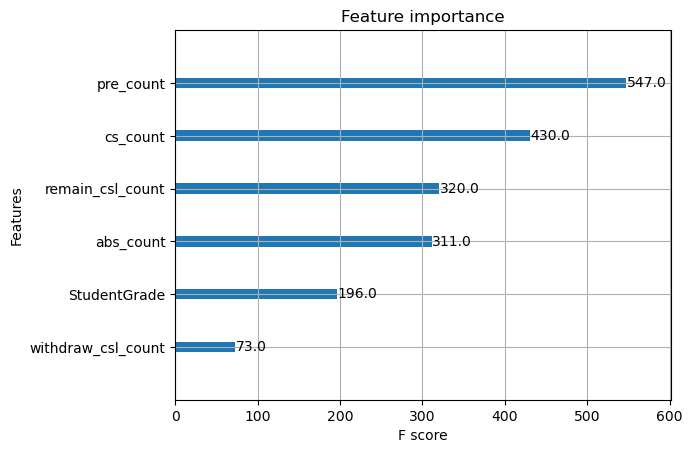

In [42]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(clf_xgb)
plt.show()

➕ SHAP(XAI) value를 통한 Feature Attribution을 파악
- SHAP(SHapley Additive exPlanations)는 기계 학습 모델의 출력을 설명하는 접근 방식입니다. 개별 데이터 포인트에 대한 모델 예측에 대한 각 기능의 기여도를 이해하기 위한 통합 프레임워크를 제공
- 이는 위 피쳐 중요도와 일관성 있는지 확인 위함

In [47]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(clf_xgb)
shap_values = explainer.shap_values(X_train)

✅Feature Importance
- 전체 Feature가 Shapley Value 분포에 어떤 영향을 미치는지 Feature Importance 시각화

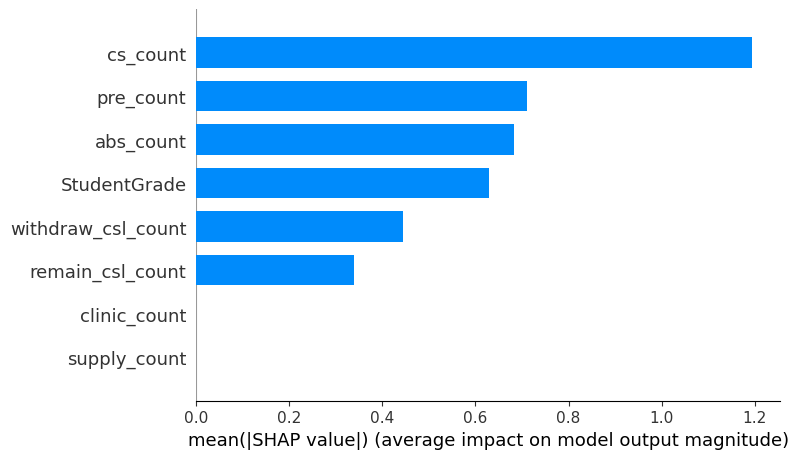

In [48]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

✅summary_plot
- summary_plot으로 feature와 예측에 미치는 영향 사이의 관계를 볼 수 있음
- 하지만 정확한 관계를 확인하려면 shap 의존도 (SHAP Dependency plot)을 확인해야함
- 양수 SHAP 값은 기능이 모델 예측을 높이는 데 기여한다는 것을 나타내고, 음수 SHAP 값은 그 반대를 나타냄. SHAP 값의 크기는 예측에 대한 특성의 영향을 나타냄

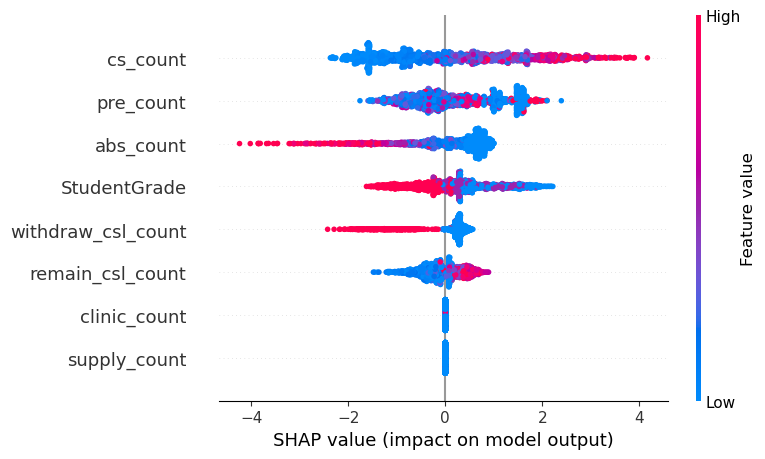

In [51]:
shap.summary_plot(shap_values, X_train)

✅Dependence_plot
- SHAP 특성 의존도는 가장 간단한 전역 해석도
- 1) 특성을 선택
- 2) 각 데이터에서 인스턴스에 대해 X축에 특성값을 표시하고 Y축에 해당하는 섀플리 값을 사용하여 점을 표시 
- 영향력이 큰 변수들을 순서대로 출력하는 방법이며, top_inds[i]에 특정 Feature를 넣어 importance를 확인할 수 있음

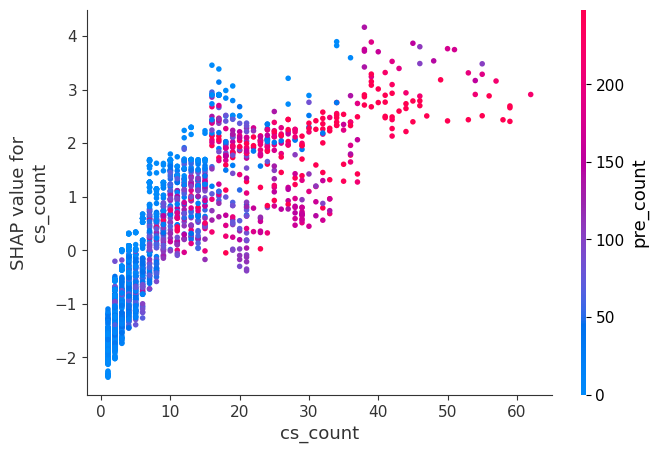

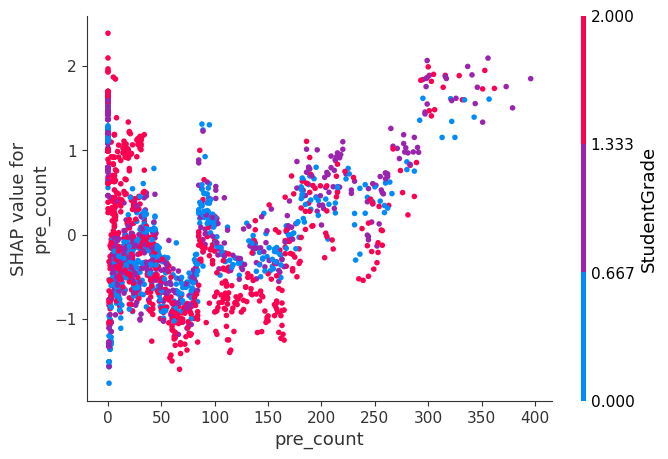

In [53]:
shap.initjs()
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))  # (13, ) : 각각의 Feature 에 대해 shap value 다 더한 것 

# make SHAP plots of the three most important features
for i in range(2):
    shap.dependence_plot(top_inds[i], shap_values, X_train)

### 12. K-Fold 교차검증(cross-validation)

In [43]:
# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# 각 폴드의 스코어 
scores = cross_val_score(clf_xgb, X, y, cv = 5)
scores

C:\Users\Ara\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:21:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Ara\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:21:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Ara\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:21:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Ara\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [

array([0.856     , 0.842     , 0.83366733, 0.84569138, 0.82765531])

In [44]:
pd.DataFrame(cross_validate(clf_xgb, X, y, cv =5))

C:\Users\Ara\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:21:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Ara\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:21:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Ara\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:21:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Ara\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [

,fit_time,score_time,test_score
0,0.162462,0.000000,0.856000
1,0.183073,0.000000,0.842000
2,0.157418,0.000000,0.833667
3,0.176550,0.000000,0.845691
4,0.180169,0.002637,0.827655


In [45]:
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.8410028056112224
